In [141]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
df = pd.read_csv('housing.csv')


In [142]:
base =[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]

df_wrk = df[base]


In [143]:
df_wrk.isnull().sum()


latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [144]:
df_ready = df_wrk.fillna(0)



In [145]:
df_ready.isnull().sum()


latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [146]:
rooms_per_household = df_ready.total_rooms / df_ready.households
bedrooms_per_room = df_ready.total_bedrooms / df_ready.total_rooms
population_per_household = df_ready.population / df_ready.households


In [147]:
#Q1: What is the most frequent observation (mode) for the column ocean_proximity
df_ready.ocean_proximity.mode()




0    <1H OCEAN
Name: ocean_proximity, dtype: object

<AxesSubplot:xlabel='ocean_proximity', ylabel='Count'>

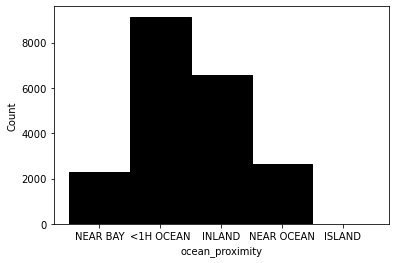

In [148]:

plt.figure(figsize=(6, 4))

sns.histplot(df.ocean_proximity, bins=40, color='black', alpha=1)

In [149]:
from sklearn.model_selection import train_test_split

y_prep = df_ready.median_house_value

df_prep = df_ready.drop(columns='median_house_value')
#drop the target value.

#build train and validation set with sklearn

df_train_full, df_test = train_test_split(df_prep, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train_full, y_test = train_test_split(y_prep, test_size=0.2, random_state=42)
y_train, y_val = train_test_split(y_train_full, test_size=0.25, random_state=42)


#Q2 What are the two features that have the biggest correlation in this dataset?
#[dataset: train dataset]

#as it's a correlation request, the value that are being confronted are the numerical ones.



df_train.dtypes

numericals = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

df_train_full[numericals].corrwith(y_prep).to_frame('correlation')


#biggest correlation with the target: median_income, total_rooms
#biggest negative correlation with the target: latitude


corr_matrix = df_train[numericals].corr()
corr_matrix

corr_analyze = corr_matrix - np.eye(corr_matrix.shape[0])
max_col = corr_analyze.max(axis=0)

max_col


latitude              0.002477
longitude             0.091670
housing_median_age    0.002477
total_rooms           0.931546
total_bedrooms        0.979399
population            0.906841
households            0.979399
median_income         0.198951
dtype: float64

In [150]:
mhv_mean = y_train.mean()
mhv_truefalse = y_train > mhv_mean
above_average_train = mhv_truefalse.astype(int)




In [151]:
#Q3

from sklearn.metrics import mutual_info_score



df_train.dtypes

mi = mutual_info_score(df_train.ocean_proximity, above_average_train)
answer = round(mi, 2)
answer

0.1

In [152]:
#train a logistic regression

#1 - onehot encoding of the ocean_proximity column.


from sklearn.feature_extraction import DictVectorizer

train_dict = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

#dv.get_feature_names()



In [153]:
from sklearn.linear_model import LogisticRegression

# in order to fit the model with a binary target (as the logistic Regression requires a binary target (or a class), not a value).
# we need to 'transform' the y_value to the binary value, which is "above the mean/below the mean value"
# so we repat what we did before, with more readable variables and with all the segments of the dataset (which splitted 
# even the y vector)

mhv_mean = y_train.mean()
mhv_truefalse = y_train > mhv_mean
above_average_train = mhv_truefalse.astype(int)

mhv2_truefalse = y_val > mhv_mean
above_average_val = mhv2_truefalse.astype(int)


mhv3_truefalse = y_test > mhv_mean
above_average_test = mhv3_truefalse.astype(int)

print(above_average_train.shape)
print(above_average_val.shape)
print(above_average_test.shape)
print(above_average_train.mean())
print(above_average_val.mean())
print(above_average_test.mean())

from IPython.display import display

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average_train)

display(model.coef_[0])


# we fit the model.
# Question 4
# now, let's calculate the accuracy of this model with the values of the validation dataset.


val_dict = df_val.to_dict(orient='records')

dv2 = DictVectorizer(sparse=False)
dv2.fit(val_dict)

X_val = dv2.transform(val_dict)

#val_dict = df_val.to_dict(orient='records')
#X_val = dv.transform(val_dict)


# predict fornisce il risultato binario

y_pred = model.predict(X_val)

# now evaluate the accuracy:
accu = round((y_pred == above_average_val).mean(),2)

accu


(12384,)
(4128,)
(4128,)
0.4076227390180879
0.40818798449612403
0.4001937984496124


array([ 4.05128749e-03,  3.44833403e-02,  1.15140248e-01,  8.58393444e-02,
        1.18291096e+00,  4.65184484e-01, -1.72868930e+00,  1.26341810e-02,
        3.38409961e-01,  8.45751119e-01, -1.60078634e-03,  1.71074465e-03,
       -1.50761817e-04])

0.84

In [155]:
# Q5
# find the least useful feature.


model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average_train)



print(df_train.head())
print(df_val.head())

original_accu = accu

col = list(df_train)

#print(col)

for field in col:
    df_copy = df_train
    df_val_copy = df_val
    df_copy = df_copy.drop(columns= field)
    df_val_copy = df_val_copy.drop(columns= field)

    val_dict = df_val_copy.to_dict(orient='records')
    dv2 = DictVectorizer(sparse=False)
    dv2.fit(val_dict)
    X_val = dv2.transform(val_dict)
    
    df_dict = df_copy.to_dict(orient='records')
    dv3 = DictVectorizer(sparse=False)
    dv3.fit(df_dict)
    X_monco = dv3.transform(df_dict)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_monco, above_average_train)
    y_pred = model.predict(X_val)
    # now evaluate the accuracy:
    accu = round((y_pred == above_average_val).mean(),2)
    print('============' )
    print(field)
    print(accu)
    print(' Difference:')
    print(original_accu - accu )
    print('============' )








       latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
17244     34.43    -119.67                39.0       1467.0           381.0   
8817      33.74    -118.32                24.0       6097.0           794.0   
19686     39.13    -121.62                41.0       1317.0           309.0   
3545      34.24    -118.63                 9.0       4759.0           924.0   
17019     37.52    -122.30                38.0       2769.0           387.0   

       population  households  median_income ocean_proximity  
17244      1404.0       374.0         2.3681       <1H OCEAN  
8817       2248.0       806.0        10.1357      NEAR OCEAN  
19686       856.0       337.0         1.6719          INLAND  
3545       1884.0       915.0         4.8333       <1H OCEAN  
17019       994.0       395.0         5.5902      NEAR OCEAN  
       latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
2071      36.74    -119.85                35.0       1191.0         

In [163]:
#Question 6

y_prep = df_ready.median_house_value

log_train_mhv = np.log1p(y_train)
log_val_mhv = np.log1p(y_val)

print(log_train_mhv)
print(log_val_mhv)

alphavalues = [0, 0.01, 0.1, 1, 10]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

from sklearn import linear_model

for a in alphavalues:
    model = linear_model.Ridge(alpha=a, solver="sag", random_state=42)
    
    val_dict = df_val.to_dict(orient='records')
    dv2 = DictVectorizer(sparse=False)
    dv2.fit(val_dict)
    X_val = dv2.transform(val_dict)
    
    df_dict = df_train.to_dict(orient='records')
    dv3 = DictVectorizer(sparse=False)
    dv3.fit(df_dict)
    X_monco = dv3.transform(df_dict)
    
    model.fit(X_monco, log_train_mhv)
    y_pred = model.predict(X_val)
    rmsevalue = rmse(log_val_mhv, y_pred)
    print('Alpha: ', a, '- RMSE: ',rmsevalue)
    

17244    12.394215
8817     13.122367
19686    11.068215
3545     12.532498
17019    12.940844
           ...    
5606     11.946012
16339    11.894105
14965    12.279792
11117    11.842236
8472     12.107914
Name: median_house_value, Length: 12384, dtype: float64
2071     11.479379
2612     11.231901
10838    12.973634
4061     12.714699
10767    13.122367
           ...    
2285     11.303451
16904    12.751303
18139    12.748981
11471    12.868248
788      12.123783
Name: median_house_value, Length: 4128, dtype: float64
[[ 182.     35.     36.74 ...  537.    190.   1191.  ]
 [ 390.     23.     41.02 ... 1060.    385.   1672.  ]
 [1589.     14.     33.67 ... 3148.   1679.   6224.  ]
 ...
 [ 582.     31.     37.34 ... 1493.    526.   3080.  ]
 [ 632.     34.     33.67 ... 1521.    667.   3712.  ]
 [ 292.     32.     37.64 ...  836.    284.   1578.  ]]
[[ 374.     39.     34.43 ... 1404.    381.   1467.  ]
 [ 806.     24.     33.74 ... 2248.    794.   6097.  ]
 [ 337.     41.     39.13